In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import RidgeCV

In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Hitters.csv")
df.dropna(inplace=True)

In [4]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()
# get_dummies converts categorical variables to numeric data (get dummy variables)

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False


In [5]:
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64") # numeric independent variables
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1) # dummy variables + numeric independent variables

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [7]:
# creation ridge model
ridge_model = Ridge(alpha=0.1).fit(X_train,y_train)

In [8]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [9]:
ridge_model.intercept_

-4.578626905723354

**Different coefficients for different λ values**

In [10]:
lambdas = 100**np.linspace(10,-2,100)*0.5

In [11]:
ridge_model = Ridge()
coef = []

for i in lambdas:
  ridge_model.set_params(alpha=i)
  ridge_model.fit(X_train,y_train)
  coef.append(ridge_model.coef_)

# her bir lambda değerine karşı bağımsız değişken sayısı kadar beta katsayısı üretildi

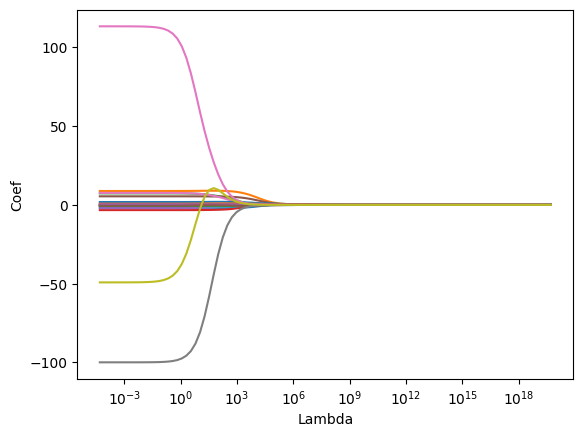

In [12]:
ax = plt.gca()
ax.plot(lambdas,coef)
ax.set_xscale("log") # x-axis is set to logarithmic
plt.xlabel("Lambda")
plt.ylabel("Coef")
plt.show()
# farklı lambda değerlerine karşı oluşan beta katsayıları
# lambda değerleri arttıkça katsayılar sıfıra yaklaşmış

**Prediction with train set**

**Train set hatası, model tuning yapmak için (parametre optimizasyonu) için kullanılır**

In [13]:
ridge_model = Ridge().fit(X_train,y_train)
y_pred = ridge_model.predict(X_train)
y_pred[0:5] # predicted values

array([376.25245449, 803.38498121, 496.17669652, 112.69554648,
       427.60020221])

In [14]:
y_train[0:5] # actual values

,Salary
183,125.0
229,1940.0
286,940.0
102,375.0
153,100.0


In [15]:
rmse = np.sqrt(mean_squared_error(y_train,y_pred))
rmse

289.34470696006565

In [16]:
# validated train error
from sklearn.model_selection import cross_val_score
np.mean(-cross_val_score(ridge_model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")) # mse

123477.15188321783

In [17]:
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,y_train,cv=10,scoring="neg_mean_squared_error"))) # rmse

351.3931585606325

**Prediction with test set**

In [18]:
y_pred = ridge_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

356.80829057302424

**Normalization**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# normalizasyon işlemi bağımsız değişkenler (özellikler) üzerinde uygulanır.

**Model Tuning**

In [20]:
ridge_model = Ridge().fit(X_train_scaled, y_train) # model
y_pred = ridge_model.predict(X_test_scaled)        # predict
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # test error
print(f"RMSE: {rmse}")

RMSE: 358.97531358902586


In [21]:
alphas1 = 10**np.linspace(10,-2,100)*0.5
alphas2 = np.random.randint(0,1000,100)

In [22]:
ridgecv = RidgeCV(alphas=alphas1, scoring="neg_mean_squared_error", cv=10)
ridgecv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [23]:
ridgecv.alpha_  # alphas1

115.5064850041579

In [28]:
ridge_tune = Ridge(alpha=ridgecv.alpha_).fit(X_train_scaled, y_train)  # ridge model
y_pred = ridge_tune.predict(X_test_scaled)                             # predict
rmse = np.sqrt(mean_squared_error(y_test, y_pred))                     # test error
print(f"RMSE: {rmse}")

RMSE: 386.0920755067467


In [32]:
# Model success for alphas2 values
ridgecv = RidgeCV(alphas=alphas2, scoring="neg_mean_squared_error", cv=10)
ridgecv.fit(X_train_scaled, y_train)
ridge_tune = Ridge(alpha=ridgecv.alpha_).fit(X_train_scaled, y_train)  # ridge model
y_pred = ridge_tune.predict(X_test_scaled)                             # predict
rmse = np.sqrt(mean_squared_error(y_test, y_pred))                     # test error
print(f"RMSE: {rmse}")

RMSE: 386.3350855596416


In [34]:
ridgecv.alpha_  # alphas2

128